In [1]:
import pandas as pd
import numpy as np
from torch import nn
import matplotlib.pyplot as plt
import sys
sys.path.append('../.')
from MyUtils.plot import *
from MyUtils.typetrans import *
from MyUtils.showinfo import *

In [2]:
train_df = pd.read_csv("./data/train.csv")

In [3]:
for i in train_df.columns:

    if train_df[i].dtype == object:
        train_df.drop(i,axis=1,inplace=True)
        continue
    if i != 'Id':
            train_df[i].fillna(value=train_df[i].mean(),inplace=True)

price_min = train_df["Sold Price"].min()
price_max = train_df["Sold Price"].max()
price_mean = train_df["Sold Price"].mean()
price_sorted_list = list(train_df["Sold Price"])
price_sorted_list.sort()

In [4]:
# train_df["Sold Price"] = np.log(np.asarray(train_df["Sold Price"]))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47439 entries, 0 to 47438
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Id                           47439 non-null  int64  
 1   Sold Price                   47439 non-null  float64
 2   Year built                   47439 non-null  float64
 3   Lot                          47439 non-null  float64
 4   Bathrooms                    47439 non-null  float64
 5   Full bathrooms               47439 non-null  float64
 6   Total interior livable area  47439 non-null  float64
 7   Total spaces                 47439 non-null  float64
 8   Garage spaces                47439 non-null  float64
 9   Elementary School Score      47439 non-null  float64
 10  Elementary School Distance   47439 non-null  float64
 11  Middle School Score          47439 non-null  float64
 12  Middle School Distance       47439 non-null  float64
 13  High School Scor

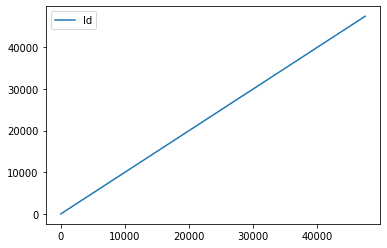

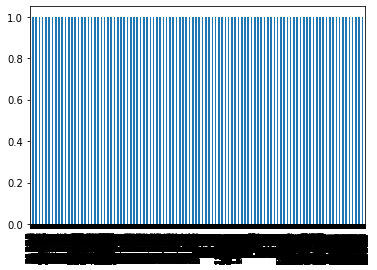

column Sold Price:
max: 90000000.0,
min: 100500.0,
mean: 1296050.499146272,
std: 1694452.2033477125



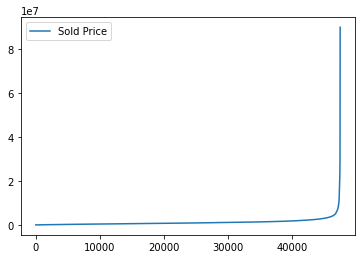

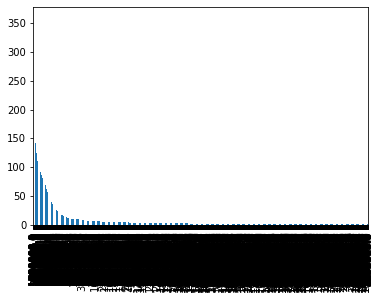

column Year built:
max: 9999.0,
min: 0.0,
mean: 1956.634888132086,
std: 144.18758951999104



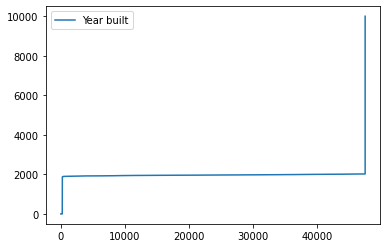

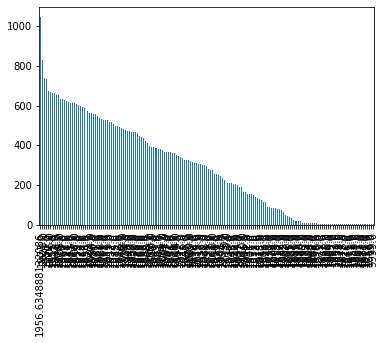

column Lot:
max: 1897473600.0,
min: 0.0,
mean: 235338.25938781648,
std: 9984801.369615383



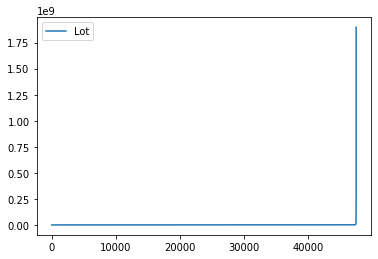

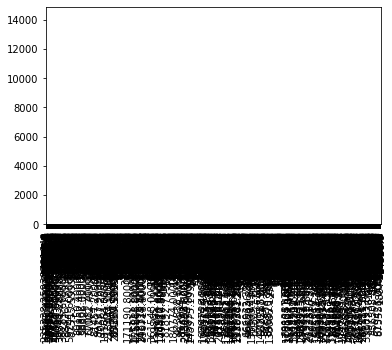

column Bathrooms:
max: 24.0,
min: 0.0,
mean: 2.3556419702551508,
std: 1.1445646101399647



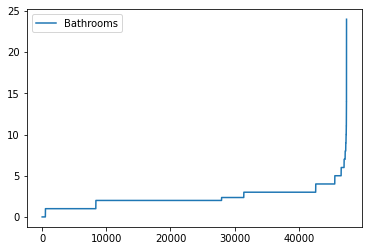

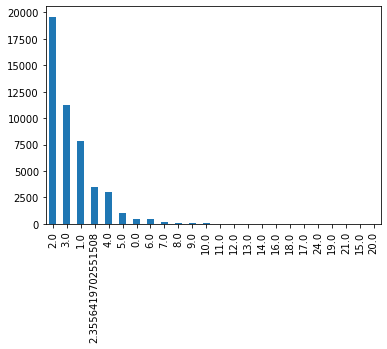

column Full bathrooms:
max: 17.0,
min: 1.0,
mean: 2.094961338252388,
std: 0.8798460546422094



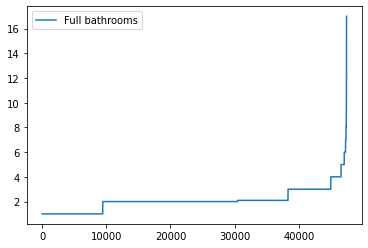

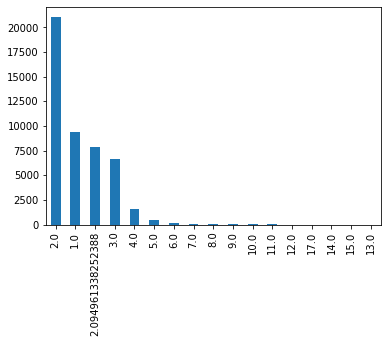

column Total interior livable area:
max: 176416380.0,
min: 1.0,
mean: 5774.587090597378,
std: 809970.1334030034



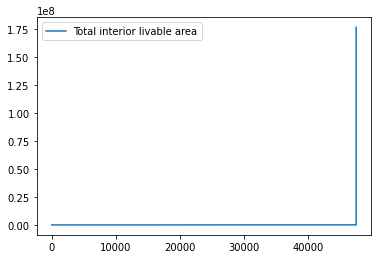

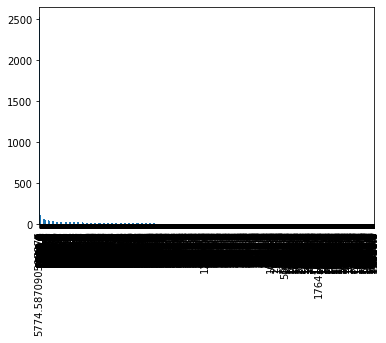

column Total spaces:
max: 1000.0,
min: -15.0,
mean: 1.5671173398104161,
std: 8.92417994740124



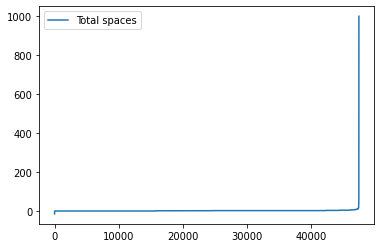

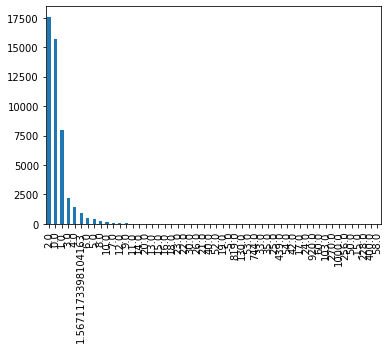

column Garage spaces:
max: 1000.0,
min: -15.0,
mean: 1.491745840677529,
std: 8.877253343915273



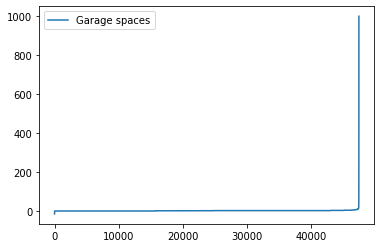

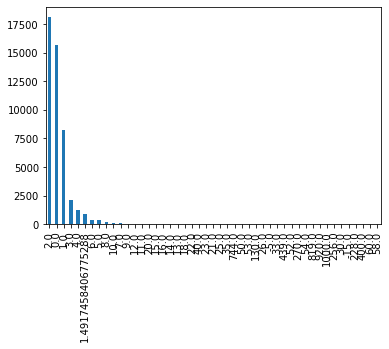

column Elementary School Score:
max: 10.0,
min: 1.0,
mean: 5.720823637261124,
std: 1.9918529113789907



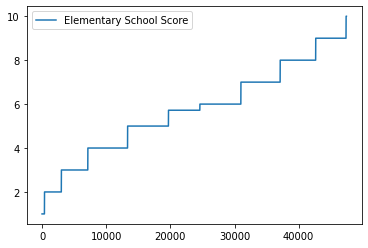

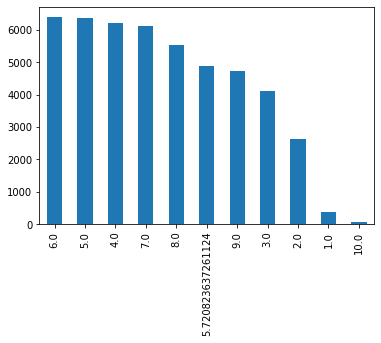

column Elementary School Distance:
max: 57.2,
min: 0.0,
mean: 1.1524111764292573,
std: 2.2127240436138016



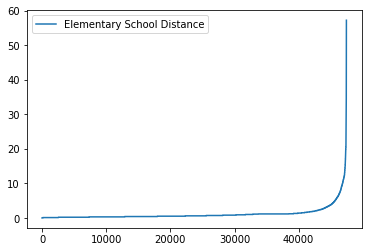

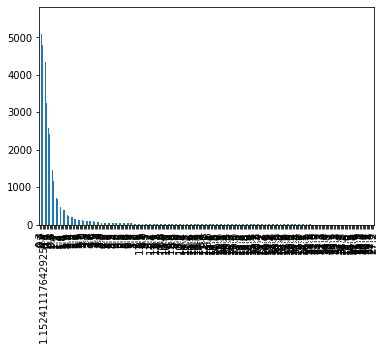

column Middle School Score:
max: 9.0,
min: 1.0,
mean: 5.3172057005271025,
std: 1.6120185127189084



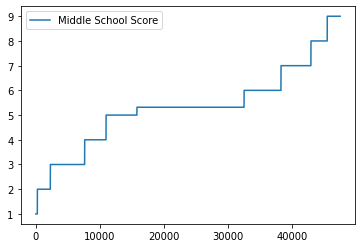

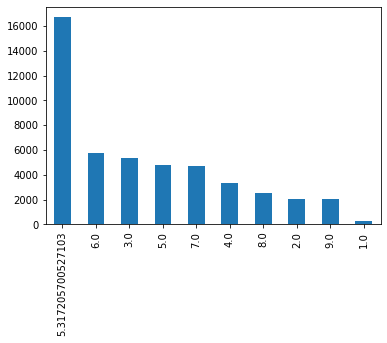

column Middle School Distance:
max: 57.2,
min: 0.0,
mean: 1.6915926468195863,
std: 1.9823916437685154



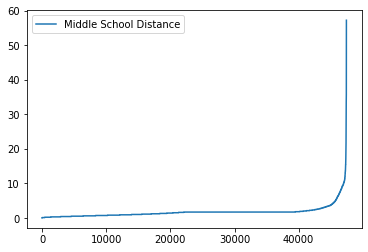

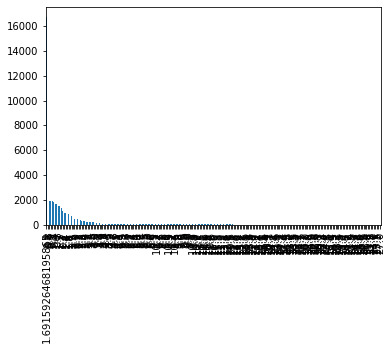

column High School Score:
max: 10.0,
min: 1.0,
mean: 6.134343912837519,
std: 1.8723548669311951



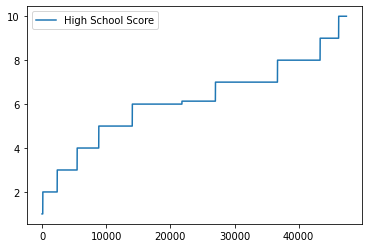

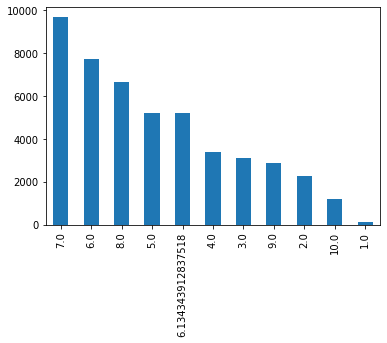

column High School Distance:
max: 73.9,
min: 0.0,
mean: 2.410365709976907,
std: 3.401287288653234



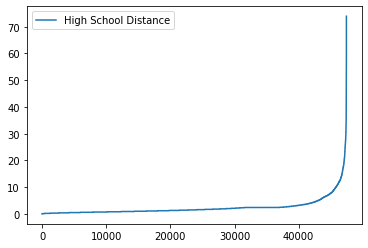

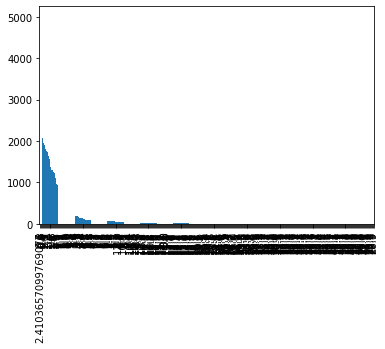

column Tax assessed value:
max: 45900000.0,
min: 0.0,
mean: 786311.7560919907,
std: 1112337.332741382



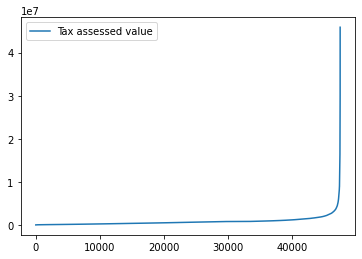

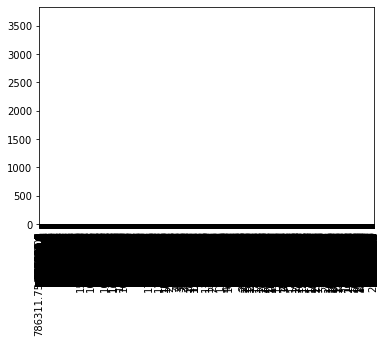

column Annual tax amount:
max: 552485.0,
min: 0.0,
mean: 9956.843817385055,
std: 13238.50837942649



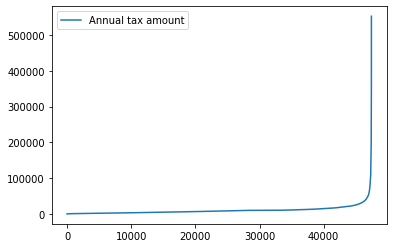

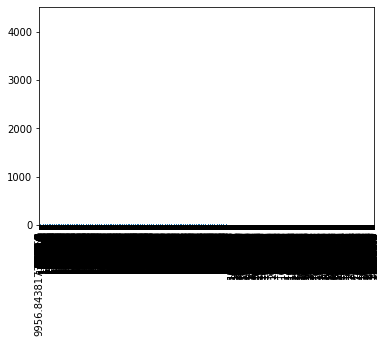

column Listed Price:
max: 402532000.0,
min: 0.0,
mean: 1315890.3278104514,
std: 2628695.457405939



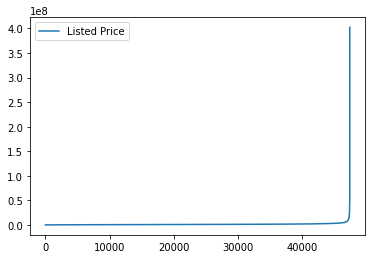

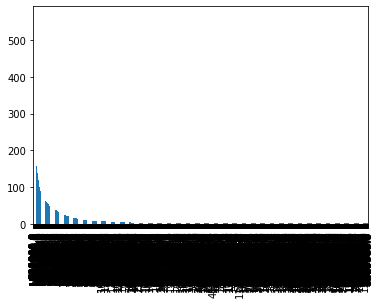

column Last Sold Price:
max: 90000000.0,
min: 0.0,
mean: 807853.7111515518,
std: 931578.8523647359



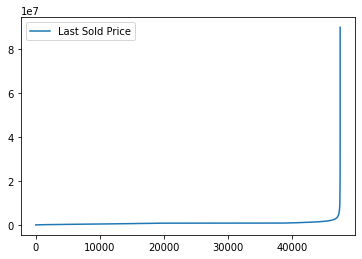

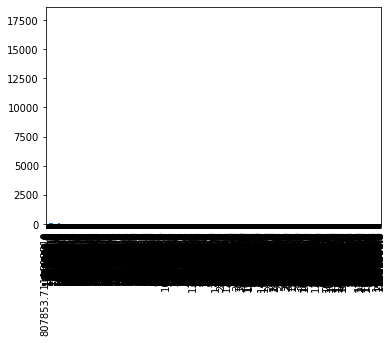

column Zip:
max: 96155,
min: 85611,
mean: 93279.17858723835,
std: 2263.4591035382764



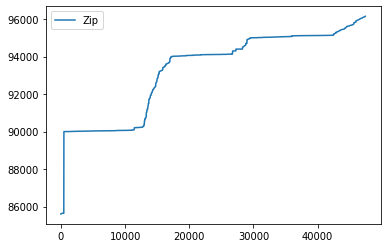

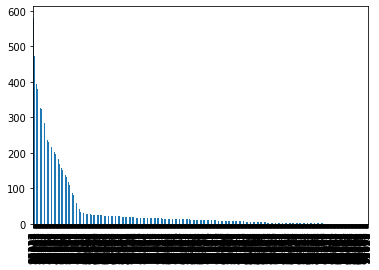

In [5]:
show_dataframe_info(train_df)

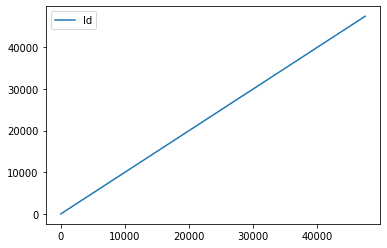

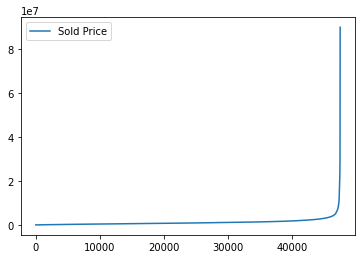

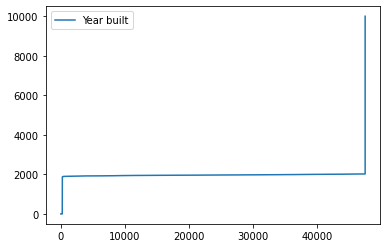

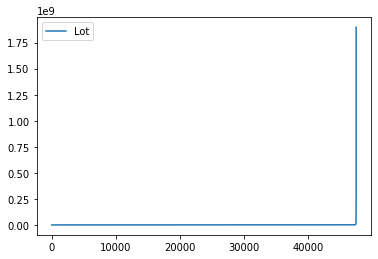

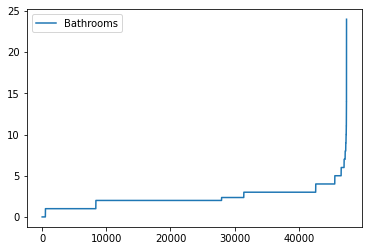

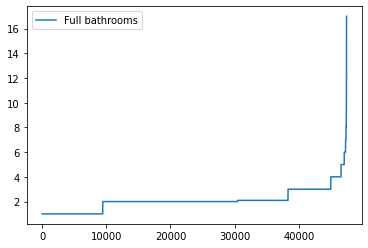

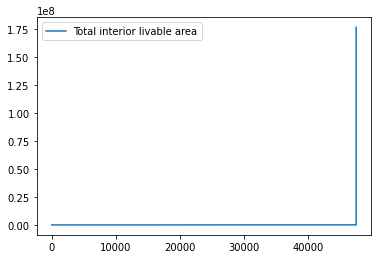

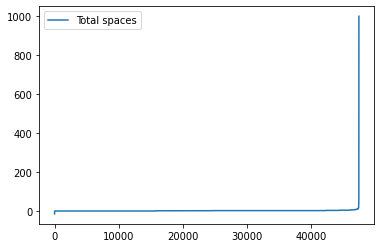

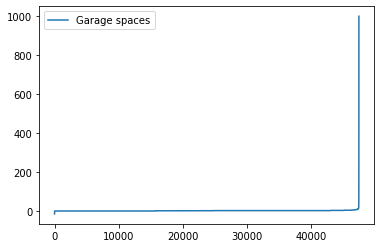

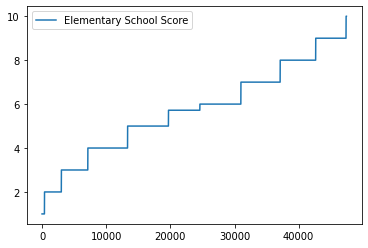

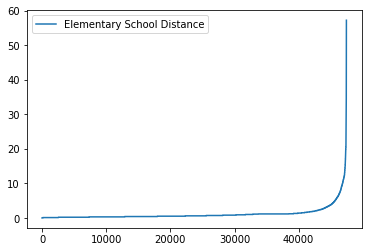

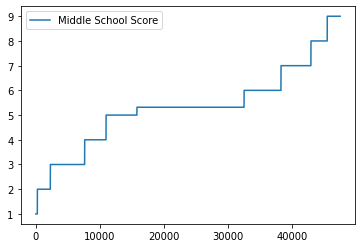

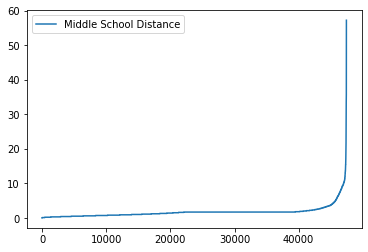

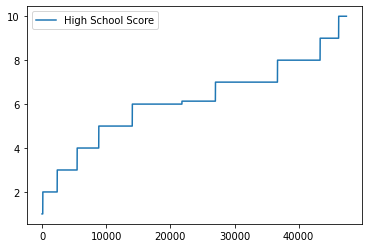

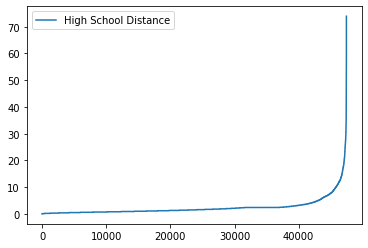

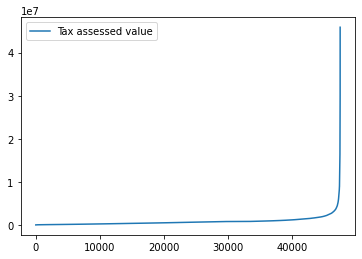

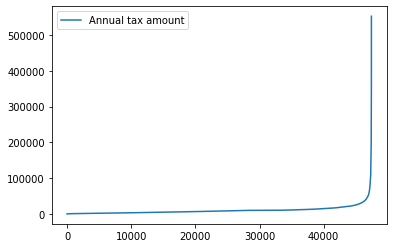

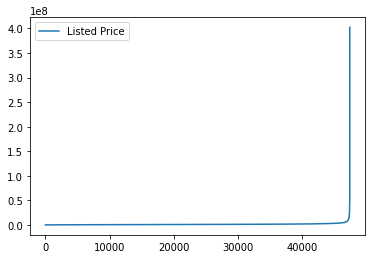

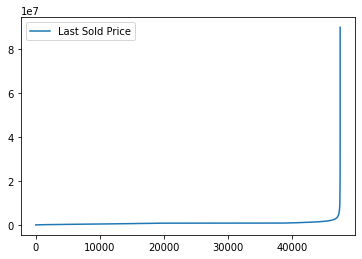

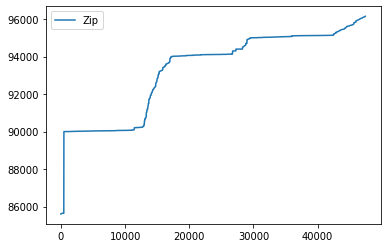

In [6]:
draw_all(train_df)

In [13]:
test = dataframe_to_list(train_df,"Last Sold Price")
np.bincount(test)
test

[807853.7111515519,
 328000.0,
 807853.7111515519,
 1500000.0,
 900000.0,
 200000.0,
 500000.0,
 807853.7111515519,
 807853.7111515519,
 807853.7111515519,
 807853.7111515519,
 807853.7111515519,
 2000000.0,
 455000.0,
 110000.0,
 1235000.0,
 497000.0,
 807853.7111515519,
 1800000.0,
 180000.0,
 807853.7111515519,
 807853.7111515519,
 807853.7111515519,
 294000.0,
 807853.7111515519,
 500000.0,
 807853.7111515519,
 807853.7111515519,
 807853.7111515519,
 882500.0,
 807853.7111515519,
 807853.7111515519,
 807853.7111515519,
 4200.0,
 807853.7111515519,
 807853.7111515519,
 807853.7111515519,
 322000.0,
 420000.0,
 360000.0,
 250000.0,
 650000.0,
 1540000.0,
 807853.7111515519,
 807853.7111515519,
 807853.7111515519,
 800000.0,
 807853.7111515519,
 1130000.0,
 807853.7111515519,
 1050000.0,
 807853.7111515519,
 256000.0,
 807853.7111515519,
 510000.0,
 807853.7111515519,
 807853.7111515519,
 2450000.0,
 1150000.0,
 419500.0,
 500058.0,
 807853.7111515519,
 10000.0,
 665000.0,
 172000.0,


In [7]:
showScale(dataframe_to_list(train_df,""))

KeyError: ''

In [ ]:
class MyModel(nn.Module):
    def __init__(self,in_featrues):
        super(self,MyModel).__init__()
        self.fc1 = nn.Linear(in_featrues,128)
        self.fc2 = nn.Linear(128,64)
        self.out = nn.Linear(64,1)
    def forward(self,x):
        x = nn.ReLU(self.fc1(x))
        x = nn.ReLU(self.fc2(x))
        return self.out(x)